# Exploratory Data Analysis 

will perform some Exploratory Data Analysis to see how different features are distribute in the dataset.

1.1 Visaulizing how age is distributed in the dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/databanks.csv")


<AxesSubplot:xlabel='age'>

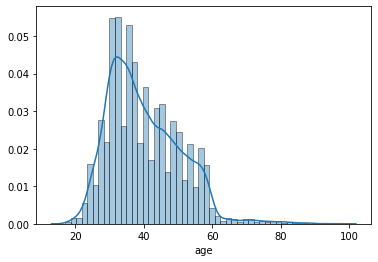

In [5]:
# Visaulizing how age is distributed in the dataset
sns.distplot(df['age'], hist = True, hist_kws = {'edgecolor':'black'})

1.2 Visualizing how Maritial Status and Education is distributed in the dataset.

Text(0, 0.5, 'Count')

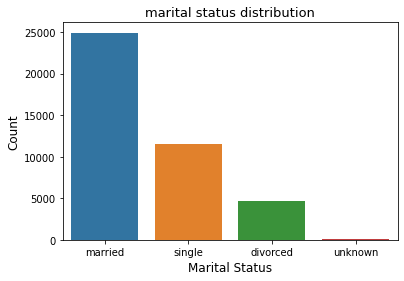

In [12]:
# First plot for marital status
sns.countplot(x = "marital", data = df)
plt.title("marital status distribution", fontsize = 13)
plt.xlabel("Marital Status", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

Text(0, 0.5, 'Count')

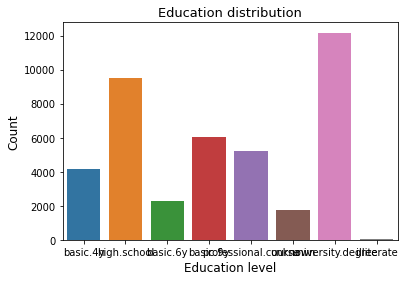

In [13]:
# Second plot for Education distribution
sns.countplot(x = "education", data = df)
plt.title("Education distribution", fontsize = 13)
plt.xlabel("Education level", fontsize = 12)
plt.ylabel("Count", fontsize = 12)


1.3 Visualizing how Jobs are distribution

Text(0.5, 1.0, 'Job Count Distribution')

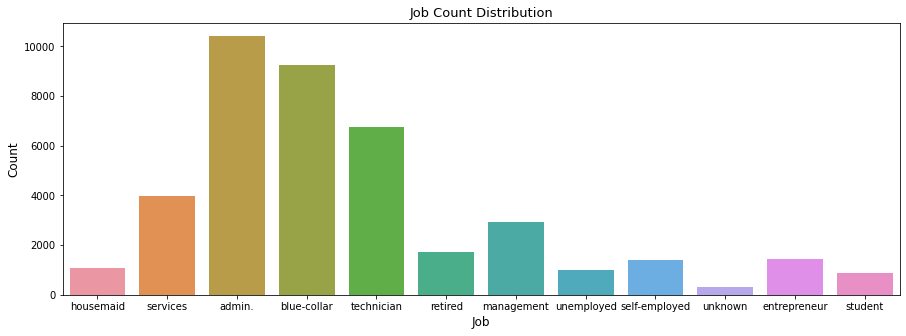

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
sns.countplot(x = "job", data = df)
ax.set_xlabel('Job', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
ax.set_title("Job Count Distribution", fontsize = 13)



1.4 Housing and Loan Distribution

Visualizing how:

    Housing Loans are distributed.
    Personal Loans are distributed.



Text(0, 0.5, 'Count')

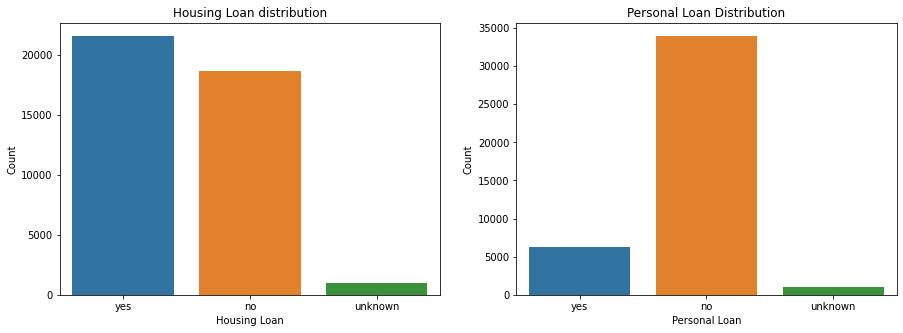

In [15]:
# Housing loan data distribution
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
sns.countplot(x = "housing", data = df, ax = ax1, order = ['yes', 'no', 'unknown'])
ax1.set_title("Housing Loan distribution")
ax1.set_xlabel("Housing Loan")
ax1.set_ylabel("Count")

# Personal loan data distribution
sns.countplot(x = "loan", data = df, ax = ax2, order = ['yes', 'no', 'unknown'])
ax2.set_title("Personal Loan Distribution")
ax2.set_xlabel("Personal Loan")
ax2.set_ylabel("Count")




Getting total count for:

    Credit Defaulters
    People with Housing loan
    People with Personal loan

Credit Defaulter


In [16]:
print("Number of people with credit default: ", df[df['default'] == 'yes']['default'].count())
print("Number of people with no credit default: ", df[df['default'] == 'no']['default'].count())
print("Number of people who's credit default is unknown: ", df[df['default'] == 'unknown']['default'].count())


Number of people with credit default:  3
Number of people with no credit default:  32588
Number of people who's credit default is unknown:  8597


In [17]:
print("Number of people with Housing loan: ", df[df['housing'] == 'yes']['housing'].count())
print("Number of people with no Housing loan: ", df[df['housing'] == 'no']['housing'].count())
print("Number of people who's Housing loan is unknown: ", df[df['housing'] == 'unknown']['housing'].count())


Number of people with Housing loan:  21576
Number of people with no Housing loan:  18622
Number of people who's Housing loan is unknown:  990


In [18]:
print("Number of people with Personal loan: ", df[df['loan'] == 'yes']['loan'].count())
print("Number of people with no Personal loan: ", df[df['loan'] == 'no']['loan'].count())
print("Number of people who's Personal loan is unknown: ", df[df['loan'] == 'unknown']['loan'].count())

Number of people with Personal loan:  6248
Number of people with no Personal loan:  33950
Number of people who's Personal loan is unknown:  990


1.4 Visualisation related to "Last Contact of the Current Campaign"

Visualisation related to Duration

Plotting duration using boxplot makes it difficult to obtain some important values like average of distribution and so I am plotting histogram on the side to see how its distributed and check for mean value (If its possible).


Text(0.5, 1.0, 'Call Duration vs Count')

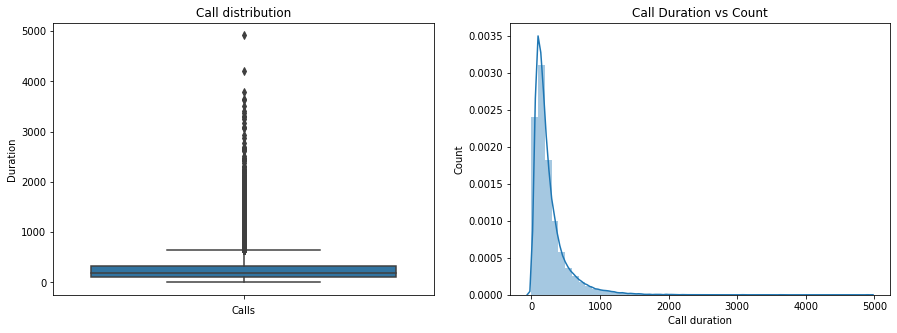

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.boxplot(x = "duration", data = df, orient = 'v', ax = ax1)
ax1.set_xlabel("Calls")
ax1.set_ylabel("Duration")
ax1.set_title("Call distribution")

sns.distplot(df['duration'], ax = ax2)
ax2.set_xlabel("Call duration")
ax2.set_ylabel("Count")
ax2.set_title("Call Duration vs Count")


Getting all the Mean, Standard Diveation, Minimum and Maximum values for duration

In [20]:

min_duration = df['duration'].min()
max_duration = df['duration'].max()
median_duration = df['duration'].mean()
standard_dev_duration = df["duration"].std()

print("Min call duration: ", min_duration)
print("Max call duration: ", max_duration)
print("Median call duration: ", round(median_duration, 2))
print("Standard diveation in call duration: ", round(standard_dev_duration, 2))

Min call duration:  0
Max call duration:  4918
Median call duration:  258.29
Standard diveation in call duration:  259.28


## We can see from the box plot that most call duration is around the mean so finding the interquartile range will help us in understanding how long the call might last

In [21]:
first_quartile = df['duration'].quantile(q = 0.25)
second_quartile = df['duration'].quantile(q = 0.50)
third_quartile = df['duration'].quantile(q = 0.75)
fourth_quartile = df['duration'].quantile(q = 1)
IRQ = third_quartile - second_quartile

print("Second Quartile: ", second_quartile)
print("Third Quartile: ", third_quartile)
print("Inter quartile range(range within which most data is present): ",IRQ)

Second Quartile:  180.0
Third Quartile:  319.0
Inter quartile range(range within which most data is present):  139.0


# Visualisation related to "Contact, Month and Day of the week" 

Text(0.5, 1.0, 'Count of Calls made on Days of the week')

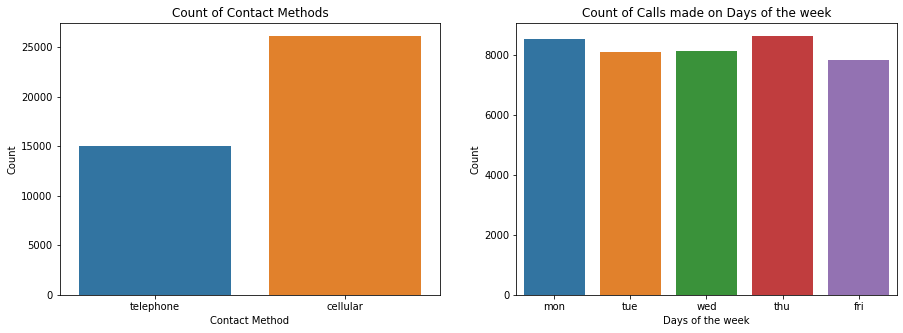

In [22]:
# For contact and Days of the week
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.countplot(x = 'contact', data = df, ax = ax1)
ax1.set_xlabel("Contact Method")
ax1.set_ylabel("Count")
ax1.set_title("Count of Contact Methods")

sns.countplot(df['day_of_week'], ax = ax2)
ax2.set_xlabel("Days of the week")
ax2.set_ylabel("Count")
ax2.set_title("Count of Calls made on Days of the week")

Text(0.5, 1.0, 'Count of contacts made in each month')

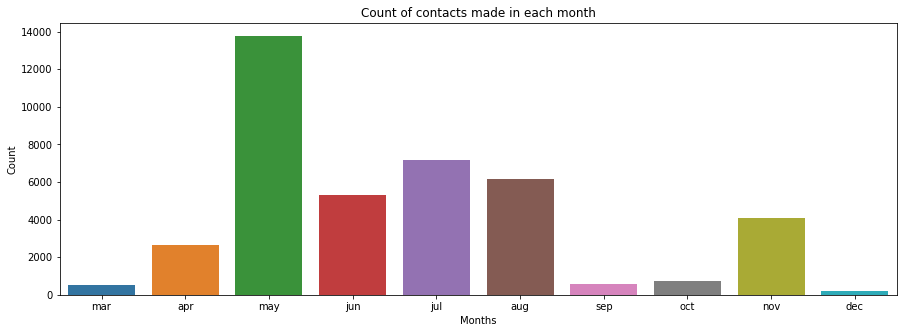

In [23]:
# For Months
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = 'month', data = df, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax.set_xlabel("Months")
ax.set_ylabel("Count")
ax.set_title("Count of contacts made in each month")

Text(0.5, 1.0, 'log(Duration) vs Jobs')

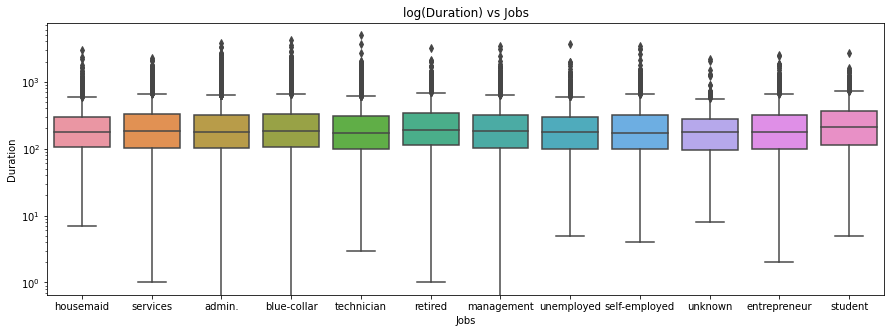

In [24]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "job", y = "duration", data = df, orient = 'v')
ax.set_xlabel("Jobs")
ax.set_ylabel("Duration")
ax.set_yscale("log")
ax.set_title("log(Duration) vs Jobs")

Text(0.5, 1.0, 'log(Duration) vs Education')

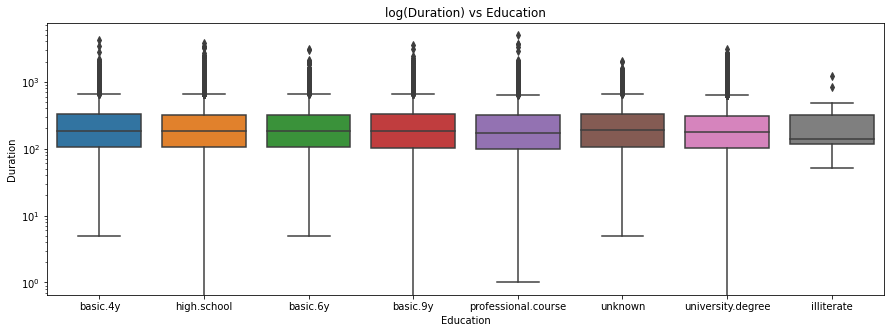

In [25]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "education", y = "duration", data = df, orient = 'v')
ax.set_xlabel("Education")
ax.set_ylabel("Duration")
ax.set_yscale("log")
ax.set_title("log(Duration) vs Education")

# From the above graph we can observe that the average duration of call is less with illiterates.